In [1398]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [1287]:
plt.style.use('seaborn')

In [1288]:
raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv("test.csv")

IDs = raw_test['PassengerId']

# Starter Code

In [1289]:
raw_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,NaN,S


In [1290]:
raw_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,917,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.5000,NaN,S
176,1068,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S
271,1163,3,"Fox, Mr. Patrick",male,NaN,0,0,368573,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
192,1084,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S


In [1291]:
train_copy = raw_train.copy(deep = True)
test_copy = raw_test.copy(deep = True)

combined_dataset = [train_copy,test_copy]

In [1292]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1293]:
train_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA

Only done on train data

### Survival Count

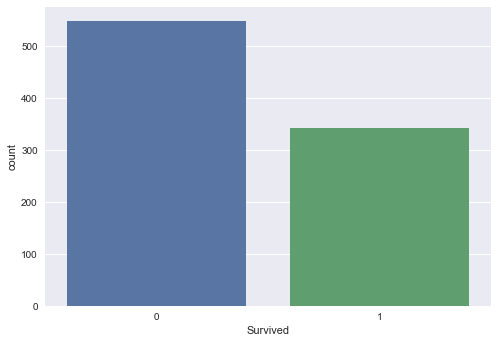

In [1294]:
sns.countplot(x = 'Survived', data = train_copy)
plt.show()

### Sex Survival

In [1295]:
sexwise_grouping = train_copy.groupby('Sex')
sexwise_survival = sexwise_grouping['Survived'].value_counts()

sexwise_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

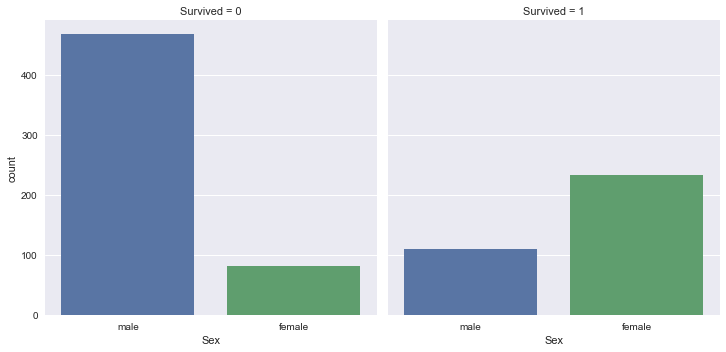

In [1296]:
sns.catplot(x = 'Sex', col = 'Survived',
            kind = 'count',
            data = train_copy)
plt.show()

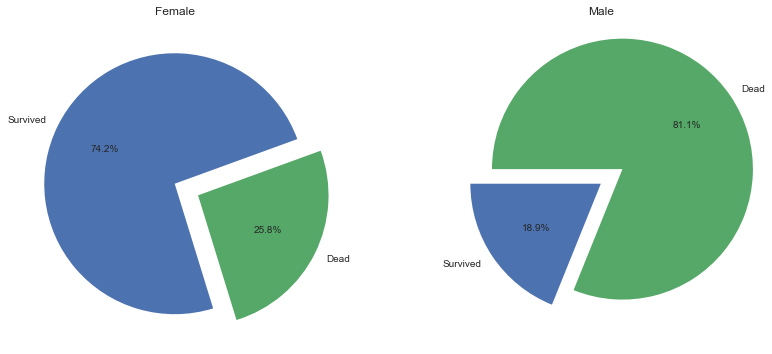

In [1297]:
women_survived = train_copy.loc[train_copy['Sex']=='female']['Survived'].sum()
total_women = train_copy.loc[train_copy['Sex']=='female'].shape[0]

men_survived = train_copy.loc[train_copy['Sex']=='male']['Survived'].sum()
total_men = train_copy.loc[train_copy['Sex']=='male'].shape[0]

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize = (14,6))

ax1.pie([women_survived,total_women-women_survived],
        labels = ['Survived','Dead'],
        autopct = '%1.1f%%',
        startangle = 20,
        explode = [0,0.2]
       )
ax1.set_title("Female")

ax2.pie([men_survived,total_men-men_survived],
        labels = ['Survived','Dead'],
        autopct = '%1.1f%%',
        startangle = 180,
        explode = [0,0.2]
       )
ax2.set_title("Male")

plt.show()

Verdict : 
Females had a better survival chance than males. Males also have a higher chance of being dead.

### Survival with PClass

In [1298]:
pd.crosstab(train_copy['Pclass'],train_copy['Survived'], 
            margins = True).style.background_gradient(cmap = 'autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


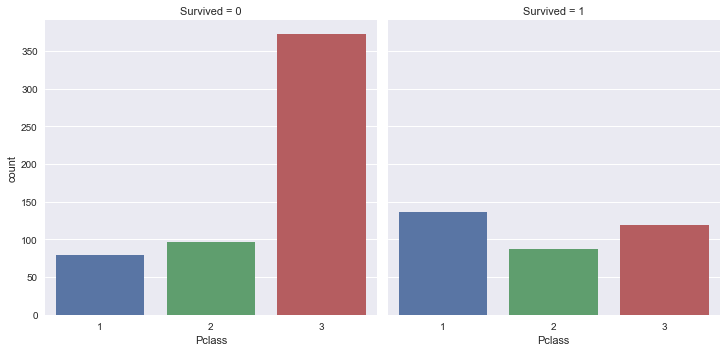

In [1299]:
sns.catplot(x = 'Pclass', col = 'Survived', kind = 'count',data = train_copy)
plt.show()

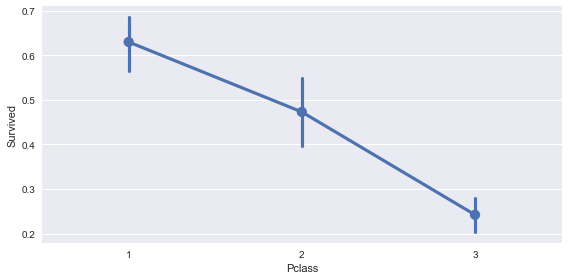

In [1300]:
sns.catplot(x = 'Pclass',y='Survived', kind = 'point',data = train_copy,
           height = 4,aspect = 2)
plt.show()

Verdict : A lot of people died in 3rd Pclass, but of those who survived, thier distribution is somewhat similar to other classes.

However, in total cummulative picture, a survival decreases with higher Pclass

### Pclass vs Sex

In [1301]:
pd.crosstab([train_copy['Sex'],train_copy['Pclass']],
            train_copy['Survived']).style.background_gradient(cmap = 'autumn_r')

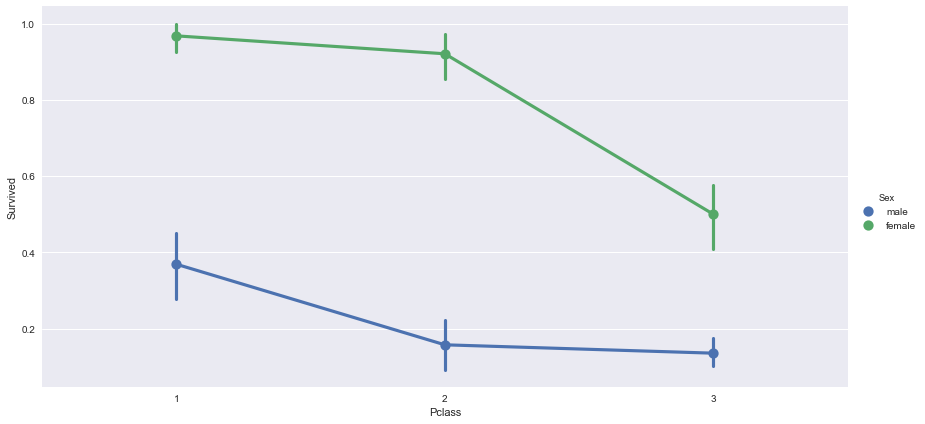

In [1302]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex',kind = 'point',data = train_copy,
           height = 6,aspect = 2)
plt.show()

### Embarked

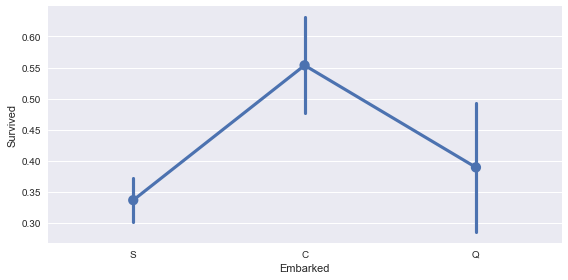

In [1303]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'point',data = train_copy, 
            height = 4,aspect = 2)
plt.show()

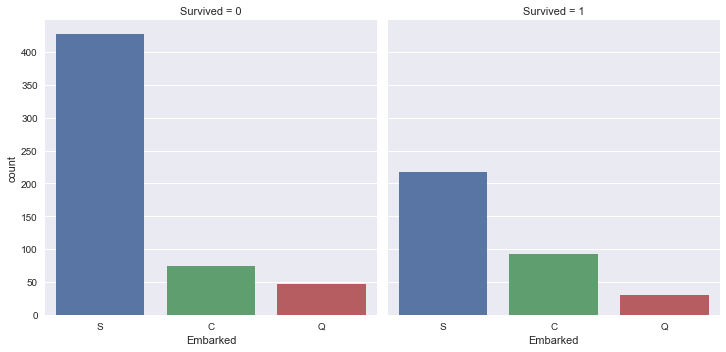

In [1304]:
sns.catplot(x = 'Embarked', col = 'Survived', kind = 'count', data = train_copy,
           height = 5, aspect = 1)
plt.show()

Verdict : Survival rate goes in the trend S>C>Q
However, in cummulative view, S class people had majority of them dying too. C class and Q class had much lower people dying in it.
S class houses most of the people, so maybe that's why it's survival count is high, when just those who survived is being considered.

### Age
Since age is a continuous variable, we will have to sort them into bins before visualisations.

We'll aim to have a rather not go for equal distribution binning, but unbiased binning by fixed age spans to find out how the actual trend is affected by age.

NOTE : We will use the max_size from both training and testing set if the test is totally unseen, and the code will make subsequent correct bins of proper length.
However, in this case, since the examples are very much familiar we know the test and train have proper max. So, we'll use train_max as reference just to ease things here.

EDIT : Found better answer in stack overflow using retbins

In [1305]:
print(train_copy['Age'].min())
print(train_copy['Age'].max())
print("-"*25)
print(test_copy['Age'].min())
print(test_copy['Age'].max())

0.42
80.0
-------------------------
0.17
76.0


In [1306]:
#8 seems bit okay as compared to rest. We can also see that majority of people were between 16-40 years of age

#ERROR : NAN values in Ages, removing astype()
#train_copy['AgeBin'] = pd.cut(train_copy['Age'].astype(int),8)

train_copy['AgeBin'],train_age_bins = pd.cut(train_copy['Age'],8,retbins = True)

In [1307]:
train_copy['AgeBin'].unique()

[(20.315, 30.263], (30.263, 40.21], NaN, (50.158, 60.105], (0.34, 10.368], (10.368, 20.315], (60.105, 70.052], (40.21, 50.158], (70.052, 80.0]]
Categories (8, interval[float64]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

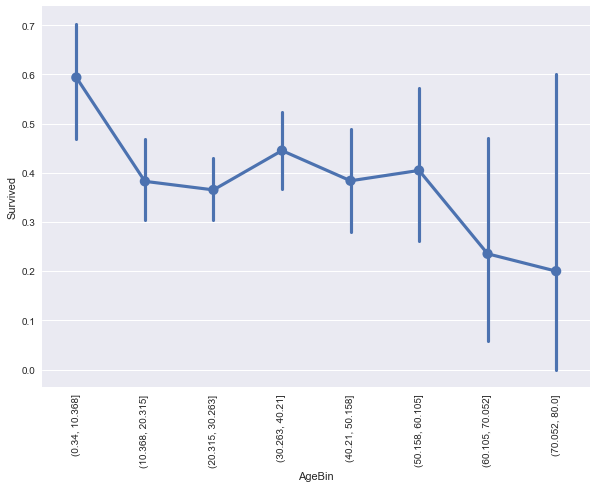

In [1308]:
sns.catplot(x = 'AgeBin', y = 'Survived', data = train_copy, kind = 'point', height = 6,aspect = 1.4)

plt.xticks(rotation = 'vertical')
plt.show()

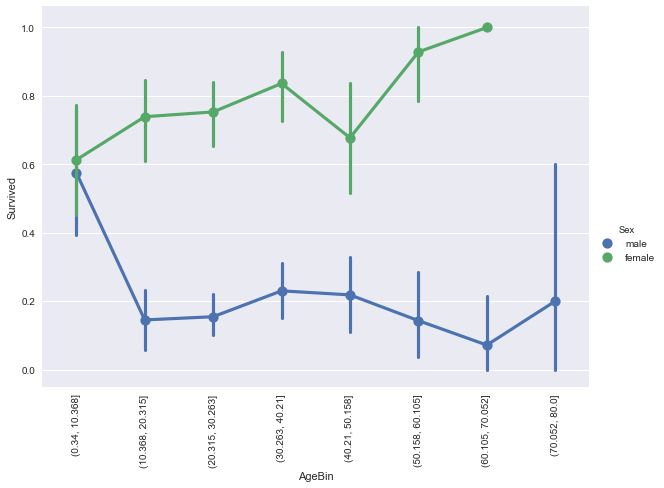

In [1309]:
sns.catplot(x = 'AgeBin', y = 'Survived', hue = 'Sex', 
            kind = 'point',
            data = train_copy,
            height = 6, aspect = 1.4,
           )

plt.xticks(rotation = 'vertical')
plt.show()

It's interesting to note that 
- older males had lesser chance of survival, 
- contratry to men, older women had better chances of survival.4

There is some anomaly in 5th bin for females.
Let's look at a crosstab to inspect it

In [1310]:
pd.crosstab([train_copy['Sex'],train_copy['Survived']],
            [train_copy['AgeBin'],train_copy['Pclass']],
            margins = True
           ).style.background_gradient(cmap='autumn_r')

### SibSp, Parch and FamilySize

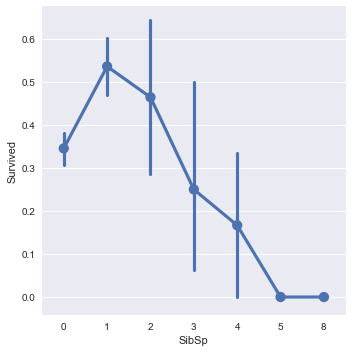

In [1311]:
sns.catplot(x = 'SibSp', y = 'Survived',kind = 'point',data = train_copy)
plt.show()

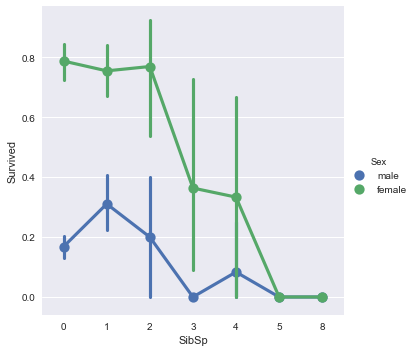

In [1312]:
sns.catplot(x = 'SibSp', y = 'Survived', hue = 'Sex', kind = 'point', data = train_copy)
plt.show()

In [1313]:
pd.crosstab([train_copy['Sex'],train_copy['Survived']],
            train_copy['SibSp'],
            margins = True
           ).style.background_gradient(cmap = 'autumn_r')

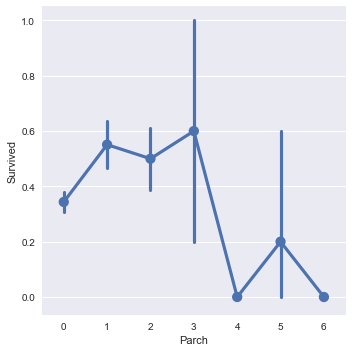

In [1314]:
sns.catplot(x = 'Parch', y = 'Survived',kind = 'point',data = train_copy)
plt.show()

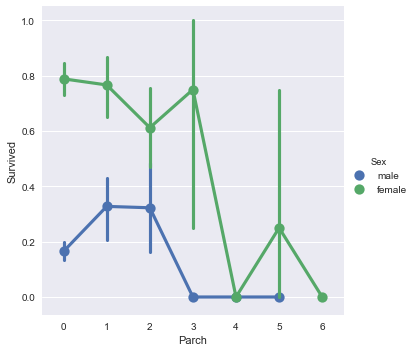

In [1315]:
sns.catplot(x = 'Parch', y = 'Survived', hue = 'Sex', kind = 'point', data = train_copy)
plt.show()

In [1316]:
pd.crosstab([train_copy['Sex'],train_copy['Survived']],
            train_copy['Parch'],
            margins = True
           ).style.background_gradient(cmap = 'autumn_r')

Verdict : 
- Males : Those with no parents or siblings are almost destined to die
- However, if thery have medium number of family members, their survival rate tends to increase.

- Females : 

In [1317]:
#Self included, thus +1 in Family size.
train_copy['FamilySize'] = train_copy['SibSp'] + train_copy['Parch'] + 1
train_copy['IsAlone'] = train_copy['FamilySize']==1

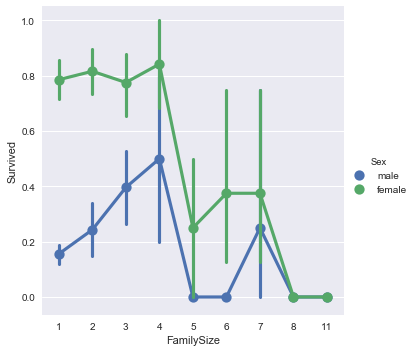

In [1318]:
sns.catplot(x = 'FamilySize', y = 'Survived', hue = 'Sex', kind = 'point', data = train_copy)
plt.show()

In [1319]:
train_copy['IsAlone'].value_counts()

True     537
False    354
Name: IsAlone, dtype: int64

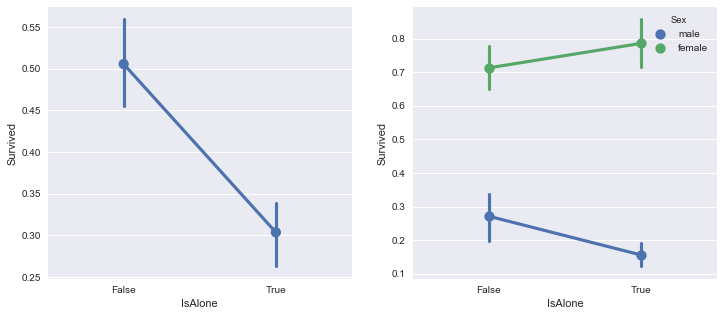

In [1320]:
fig, saxis = plt.subplots(1, 2,figsize=(12,5))

sns.pointplot(x = 'IsAlone', y = 'Survived',  kind = 'point', data = train_copy, ax = saxis[0])
sns.pointplot(x = 'IsAlone', y = 'Survived', hue = 'Sex', kind = 'point', data = train_copy, ax = saxis[1])

In [1321]:
pd.crosstab([train_copy['Sex'],train_copy['Survived']],
            [train_copy['IsAlone'],train_copy['FamilySize']],
            margins = True
           ).style.background_gradient(cmap = 'autumn_r')

We'll drop FamilySize since it's just being used for aid in calculating IsAlone.
It shares almost same pattern as SibSp and Parch.

We'll most probably label encode IsAlone, since males have higher survival rate when they're alone as compared to being not alone.
This is contrary in the case of women.

### Fare

This is also a continuous variable. We'll try to obin this too.
Since we have very small null values, it should be fine.

We can aim for a ranges such that the fares are evenly distributed, as thier binning with fixed ranges tends to shift most observations in the 0-100 category, thus other ranges are just affected by as small as 10 samples.

In [1322]:
print(train_copy['Fare'].min())
print(train_copy['Fare'].max())
print("-"*25)
print(test_copy['Fare'].min())
print(test_copy['Fare'].max())

0.0
512.3292
-------------------------
0.0
512.3292


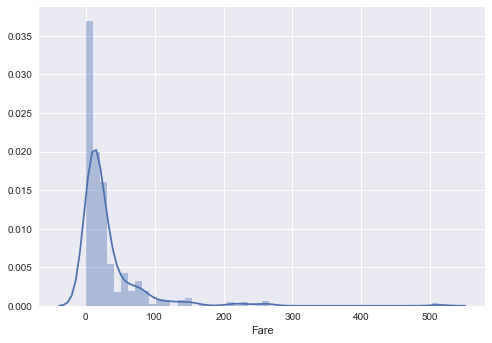

In [1323]:
sns.distplot(train_copy['Fare'])
plt.show()

In [1324]:
#Evenly distributing the Fare in FareBin
train_copy['FareBin'],train_fare_bins = pd.qcut(train_copy['Fare'],8,retbins = True)

In [1325]:
train_copy['FareBin'].unique()

[(-0.001, 7.75], (69.488, 512.329], (7.91, 9.841], (31.0, 69.488], (14.454, 24.479], (9.841, 14.454], (24.479, 31.0], (7.75, 7.91]]
Categories (8, interval[float64]): [(-0.001, 7.75] < (7.75, 7.91] < (7.91, 9.841] < (9.841, 14.454] < (14.454, 24.479] < (24.479, 31.0] < (31.0, 69.488] < (69.488, 512.329]]

In [1326]:
train_copy['FareBin'].value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: FareBin, dtype: int64

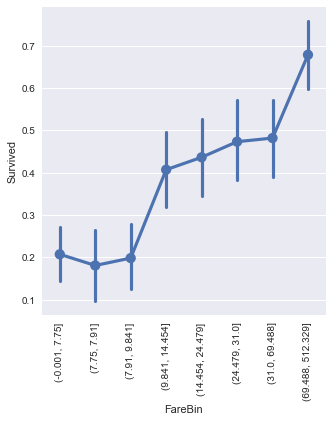

In [1327]:
sns.catplot(x = 'FareBin', y = 'Survived',kind = 'point',data = train_copy)
plt.xticks(rotation = 'vertical')
plt.show()

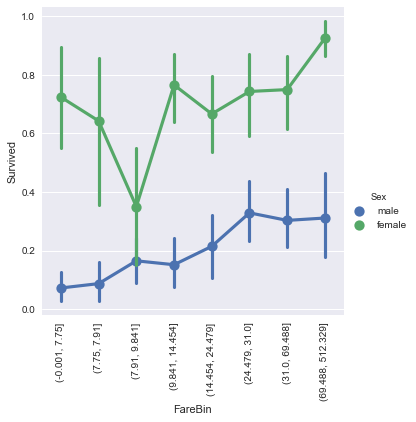

In [1328]:
sns.catplot(x = 'FareBin', y = 'Survived',hue = 'Sex',kind = 'point',data = train_copy)
plt.xticks(rotation = 'vertical')
plt.show()

In [1329]:
pd.crosstab([train_copy['Sex'],train_copy['Survived']],
            train_copy['FareBin'],
            margins = True
           ).style.background_gradient(cmap = 'autumn_r')

In [1330]:
pd.crosstab([train_copy['Sex'],train_copy['Survived']],
            [train_copy['FareBin'],train_copy['Pclass']],
            margins = True
           ).style.background_gradient(cmap = 'autumn_r')

In [1331]:
train_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBin         177
FamilySize       0
IsAlone          0
FareBin          0
dtype: int64

As expected, majority of female survived if they belonged to Pclass = 1 for FareBin 69-512

### Name and Titles

In [1332]:
train_copy.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,IsAlone,FareBin
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,"(0.34, 10.368]",4,False,"(24.479, 31.0]"
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C,"(40.21, 50.158]",1,True,"(69.488, 512.329]"
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C,"(20.315, 30.263]",2,False,"(31.0, 69.488]"
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,"(0.34, 10.368]",6,False,"(24.479, 31.0]"


In [1333]:
train_copy['Title'] = train_copy['Name'].apply(lambda x : x.split(',')[1].strip().split(" ")[0]) 
train_copy['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Sir.           1
Lady.          1
Ms.            1
Capt.          1
Don.           1
Mme.           1
the            1
Jonkheer.      1
Name: Title, dtype: int64

In [1334]:
train_title_bin = ['Mr.', 'Mrs.', 'Miss.', 'Master.']
train_copy['Title']=train_copy['Title'].apply(lambda x : x if x in train_title_bin else 'Misc.')

train_copy.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,IsAlone,FareBin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]",2,False,"(-0.001, 7.75]",Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]",2,False,"(69.488, 512.329]",Mrs.


In [1335]:
train_copy['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Misc.'], dtype=object)

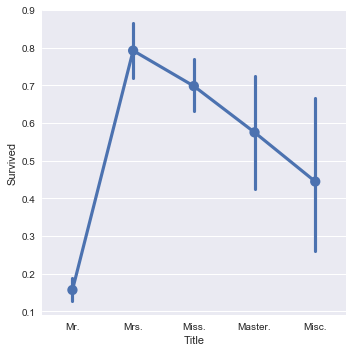

In [1336]:
sns.catplot(x = 'Title', y = 'Survived', kind = 'point', data = train_copy)
plt.show()

## Data Cleaning
- checking null
- filling null
- preprocessing test data

We saw all the trends of the train data bove without any touching any NaN values, so we have a kind of clear picture. However, now we can get to filling out approximations in the null values. Since we have most of the new features extracted, we can use them to our advantage to group and aggregate data and make proper approximations

In [1337]:
print(train_copy.isnull().sum())
print("-"*25)
print(test_copy.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBin         177
FamilySize       0
IsAlone          0
FareBin          0
Title            0
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1338]:
#TEMPORARY : Just using median and mode for now

train_copy['Age'].fillna(train_copy['Age'].median(),inplace = True)
train_copy['Embarked'].fillna(train_copy['Embarked'].mode()[0], inplace = True)

test_copy['Age'].fillna(test_copy['Age'].median(), inplace = True)
test_copy['Fare'].fillna(test_copy['Fare'].median(), inplace = True)

print("Temporary solution done")

Temporary solution done


Before moving on, let us popoulate train_copy and test_copy with preprocessing again now that we've seen uninterrupted data trends, and later filled the NaN with approxmimations.

In [1339]:
#AGEBIN

train_copy['AgeBin'] = pd.cut(train_copy['Age'], train_age_bins) #Recalc as Train had NaN in these

test_age_bins = np.concatenate(([-np.inf], train_age_bins[1:-1], [np.inf]))
test_copy['AgeBin'] = pd.cut(test_copy['Age'], test_age_bins)

#FAREBIN : No NaN in train.

test_fare_bins = np.concatenate(([-np.inf], train_fare_bins[1:-1], [np.inf]))
test_copy['FareBin'] = pd.cut(test_copy['Fare'], test_fare_bins)

#No ppreprocessing on Embarked for any new features. Will just be one hot encoded. Skip.

#TITLES

test_copy['Title'] = test_copy['Name'].apply(lambda x : x.split(',')[1].strip().split(" ")[0]) 
test_copy['Title'] = test_copy['Title'].apply(lambda x : x if x in train_title_bin else 'Misc.')

#FAMILYSIZE and ISALONE

test_copy['FamilySize'] = test_copy['SibSp'] + test_copy['Parch'] + 1
test_copy['IsAlone'] = test_copy['FamilySize']>1

print("Done. Final Check")
print(train_copy.isnull().sum())
print("-"*25)
print(test_copy.isnull().sum())

Done. Final Check
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeBin           0
FamilySize       0
IsAlone          0
FareBin          0
Title            0
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeBin           0
FareBin          0
Title            0
FamilySize       0
IsAlone          0
dtype: int64


## Data Wrangling

In [1340]:
print(train_copy.shape)
print(test_copy.shape)

#combined = [train_copy, test_copy] #Lot of problems due to lack of inplace operator in all functions. Just use assingment for now

(891, 17)
(418, 16)


In [1341]:
train_copy.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
AgeBin         category
FamilySize        int64
IsAlone            bool
FareBin        category
Title            object
dtype: object

In [1342]:
train_copy.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,IsAlone,FareBin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,"(20.315, 30.263]",2,False,"(-0.001, 7.75]",Mr.


In [1343]:
passengerid = test_copy['PassengerId']

'''
for dataset in combined:
    #dataset = dataset.drop(['Cabin','PassengerId','Ticket','Name','FamilySize','Fare'],axis = 'columns')
    #NOTE : This doesn't reflect changes back in train_copy unless inplace is used.
    #If the function doesn't support inplace just use the normal assignment operator for now
    
    dataset.drop(['Cabin','PassengerId','Ticket','Name','FamilySize','Fare'],axis = 'columns',inplace = True)
'''

train_copy = train_copy.drop(['Cabin','Age','PassengerId','Ticket','Name','FamilySize','Fare'],axis = 'columns')
test_copy = test_copy.drop(['Cabin','Age','PassengerId','Ticket','Name','FamilySize','Fare'],axis = 'columns')

In [1344]:
dummy_cols = ['Embarked','AgeBin','FareBin','Title']

In [1345]:
#For Label Encoding preview
train_copy.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBin,IsAlone,FareBin,Title
0,0,3,male,22.0,1,0,S,"(20.315, 30.263]",False,"(-0.001, 7.75]",Mr.
1,1,1,female,38.0,1,0,C,"(30.263, 40.21]",False,"(69.488, 512.329]",Mrs.
2,1,3,female,26.0,0,0,S,"(20.315, 30.263]",True,"(7.91, 9.841]",Miss.


In [1346]:
train_copy = pd.get_dummies(train_copy,columns = dummy_cols)
test_copy = pd.get_dummies(test_copy, columns = dummy_cols)

In [1347]:
#Label Encoding Sex, Pclass and IsAlone as they show some linear trend in the train
#females > males for survival
#Being alone < being with family for survivial
#Higher social status, ie, lower Pclass better for survival

labeler = LabelEncoder()

'''
for dataset in combined:
    dataset['Sex'] = labeler.fit_transform(dataset['Sex'])
    dataset['IsAlone'] = labeler.fit_transform(dataset['IsAlone'])
    dataset['Pclass'] = labeler.fit_transform(dataset['Pclass'])
    
    #print(dataset.head(5))

train_copy = combined[0]
test_copy = combined[1]
'''

train_copy['Sex'] = labeler.fit_transform(train_copy['Sex'])
train_copy['IsAlone'] = labeler.fit_transform(train_copy['IsAlone'])
train_copy['Pclass'] = labeler.fit_transform(train_copy['Pclass'])
    
test_copy['Sex'] = labeler.fit_transform(test_copy['Sex'])
test_copy['IsAlone'] = labeler.fit_transform(test_copy['IsAlone'])
test_copy['Pclass'] = labeler.fit_transform(test_copy['Pclass'])

In [1348]:
train_copy.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,IsAlone,Embarked_C,Embarked_Q,Embarked_S,...,"FareBin_(9.841, 14.454]","FareBin_(14.454, 24.479]","FareBin_(24.479, 31.0]","FareBin_(31.0, 69.488]","FareBin_(69.488, 512.329]",Title_Master.,Title_Misc.,Title_Miss.,Title_Mr.,Title_Mrs.
0,0,2,1,22.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,38.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,2,0,26.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [1349]:
train_copy['Pclass'].unique()

array([2, 0, 1], dtype=int64)

Male has been assigned 1 and female as 0. This will work as the ML algo should detect that lower values tend to survive more (female vs male). However, for own readability, we'll switch things up ourself.
Same goes for Pclass.
IsAlone can be left the way it is as having 0 for false and 1 for true makes some intuitive sense and ML will figure out the linear dependency on it's own.

In [1350]:
train_copy['Sex'] = train_copy['Sex'].apply(lambda x : 0 if x is 1 else 1)
test_copy['Sex'] = test_copy['Sex'].apply(lambda x : 0 if x is 1 else 1)

In [1385]:
def ChangePclass(cell):
    if(cell is 0):
        return int(3)
    elif(cell is 1):
        return int(2)
    elif(cell is 2):
        return int(1)

train_copy['Pclass'] = train_copy['Pclass'].apply(lambda x : ChangePclass(x))
test_copy['Pclass'] = test_copy['Pclass'].apply(lambda x : ChangePclass(x))

In [1390]:
train_copy.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,IsAlone,Embarked_C,Embarked_Q,Embarked_S,...,"FareBin_(9.841, 14.454]","FareBin_(14.454, 24.479]","FareBin_(24.479, 31.0]","FareBin_(31.0, 69.488]","FareBin_(69.488, 512.329]",Title_Master.,Title_Misc.,Title_Miss.,Title_Mr.,Title_Mrs.
0,0,1,0,22.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,3,1,38.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


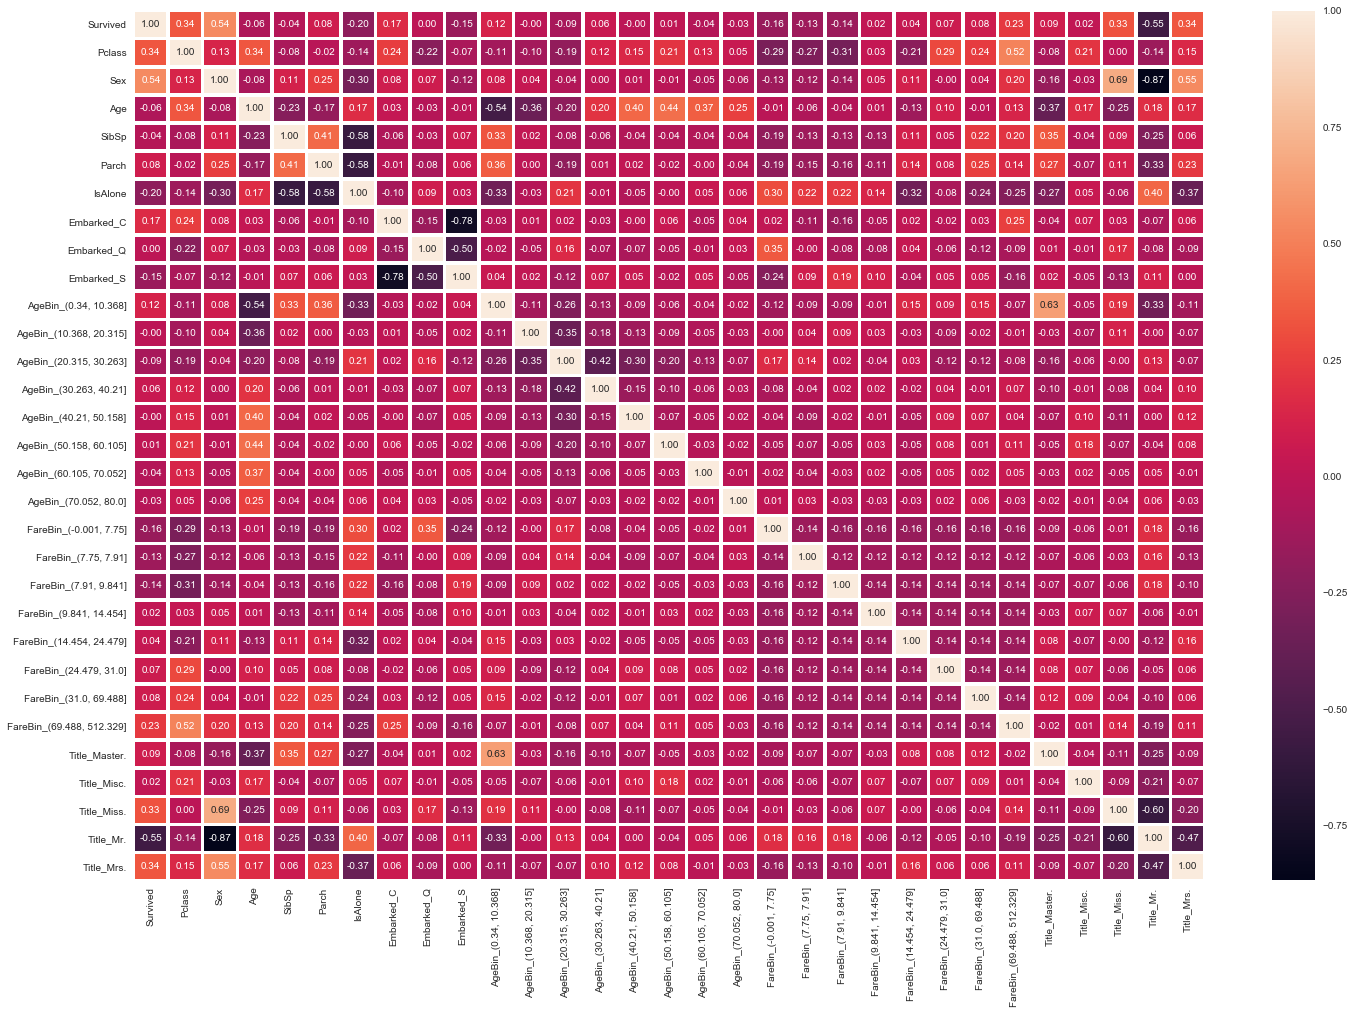

In [1397]:
corr = train_copy.corr()

fig, axes = plt.subplots(figsize = (24,16))
sns.heatmap (corr, annot = True, linewidths = 2.5, fmt = '0.2f', ax = axes )
plt.show()

## Standardization

In [1402]:
scaler = StandardScaler()

scaler.fit(train_copy.drop('Survived',axis = 1)) #As long as drop is not done inplace, it's fine
scaled_features = scaler.transform(train_copy.drop('Survived',axis = 1))

testing = pd.DataFrame(scaled_features, columns = train_copy.columns[1:])

#LATER

In [1421]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_copy.drop('Survived',axis = 1),train_copy['Survived'], random_state = 42, test_size = 0.2)

X_train_all = train_copy.drop('Survived',axis = 1)
y_train_all = train_copy['Survived']
X_test_all = test_copy

## Model Selection

In [1422]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Logistic Reg

In [1429]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_valid)

print(confusion_matrix(y_valid, pred_logreg))
print(classification_report(y_valid, pred_logreg))

print("Overall summarized accuracy",accuracy_score(y_valid, pred_logreg))

[[88 17]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Overall summarized accuracy 0.8100558659217877


C:\Users\Siraz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1433]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = passengerid
sub_logreg['Survived'] = pred_all_logreg

sub_logreg.to_csv('logmodel.csv',index=False)

C:\Users\Siraz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### GaussianNB

In [1434]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_valid)
print(confusion_matrix(y_valid, pred_gnb))
print(classification_report(y_valid, pred_gnb))
print(accuracy_score(y_valid, pred_gnb))

[[79 26]
 [19 55]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.68      0.74      0.71        74

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.75      0.75       179

0.7486033519553073


In [1438]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

pred_knn = knn.predict(X_valid)
print(confusion_matrix(y_valid, pred_knn))
print(classification_report(y_valid, pred_knn))
print(accuracy_score(y_valid, pred_knn))

[[98  7]
 [37 37]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       105
           1       0.84      0.50      0.63        74

    accuracy                           0.75       179
   macro avg       0.78      0.72      0.72       179
weighted avg       0.77      0.75      0.74       179

0.7541899441340782


In [1441]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred_dtree = dtree.predict(X_valid)
print(classification_report(y_valid,pred_dtree))
print(accuracy_score(y_valid, pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

0.8044692737430168


In [1442]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_valid)
print(classification_report(y_valid, pred_dtree_2))
print(accuracy_score(y_valid, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

0.8044692737430168


In [1444]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

sub_dtree = pd.DataFrame()
sub_dtree['PassengerId'] = passengerid
sub_dtree['Survived'] = pred_all_dtree2

sub_dtree.to_csv('dtreemodel.csv',index=False)

In [1445]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1446]:
pred_rfc = rfc.predict(X_valid)
print(confusion_matrix(y_valid, pred_rfc))
print(classification_report(y_valid, pred_rfc))
print(accuracy_score(y_valid, pred_rfc))

[[92 13]
 [18 56]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

0.8268156424581006


In [1447]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [1449]:
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = passengerid
sub_rfc['Survived'] = pred_all_rfc
sub_rfc.to_csv('randforest.csv',index=False)

In [1451]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1453]:
pred_svc = svc.predict(X_valid)
print(confusion_matrix(y_valid, pred_svc))
print(classification_report(y_valid, pred_svc))
print(accuracy_score(y_valid, pred_svc))

[[93 12]
 [24 50]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

0.7988826815642458


In [1456]:
svc.fit(X_train_all, y_train_all)
pred_all_svc = svc.predict(X_test_all)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = passengerid
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

### XGBClassifier

In [1468]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_valid.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_valid.columns.values]
X_train_all.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_all.columns.values]
X_test_all.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test_all.columns.values]

In [1509]:
from xgboost import XGBClassifier

xgbclassifier = XGBClassifier(n_estimators = 2,max_depth = 10, random_state = 42,learning_rate = 0.001)
xgbclassifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=2, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1510]:
pred_xgb = xgbclassifier.predict(X_valid)
print(confusion_matrix(y_valid, pred_xgb))
print(classification_report(y_valid, pred_xgb))
print(accuracy_score(y_valid, pred_xgb))

[[93 12]
 [18 56]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

0.8324022346368715


In [1511]:
xgbclassifier.fit(X_train_all, y_train_all)
pred_all_xgb = xgbclassifier.predict(X_test_all)

sub_xgb = pd.DataFrame()
sub_xgb['PassengerId'] = passengerid
sub_xgb['Survived'] = pred_all_xgb
sub_xgb.to_csv('svc.csv',index=False)

ValueError: feature_names mismatch: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeBin_(0.34, 10.368_', 'AgeBin_(10.368, 20.315_', 'AgeBin_(20.315, 30.263_', 'AgeBin_(30.263, 40.21_', 'AgeBin_(40.21, 50.158_', 'AgeBin_(50.158, 60.105_', 'AgeBin_(60.105, 70.052_', 'AgeBin_(70.052, 80.0_', 'FareBin_(-0.001, 7.75_', 'FareBin_(7.75, 7.91_', 'FareBin_(7.91, 9.841_', 'FareBin_(9.841, 14.454_', 'FareBin_(14.454, 24.479_', 'FareBin_(24.479, 31.0_', 'FareBin_(31.0, 69.488_', 'FareBin_(69.488, 512.329_', 'Title_Master.', 'Title_Misc.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.'] ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeBin_(-inf, 10.368_', 'AgeBin_(10.368, 20.315_', 'AgeBin_(20.315, 30.263_', 'AgeBin_(30.263, 40.21_', 'AgeBin_(40.21, 50.158_', 'AgeBin_(50.158, 60.105_', 'AgeBin_(60.105, 70.052_', 'AgeBin_(70.052, inf_', 'FareBin_(-inf, 7.75_', 'FareBin_(7.75, 7.91_', 'FareBin_(7.91, 9.841_', 'FareBin_(9.841, 14.454_', 'FareBin_(14.454, 24.479_', 'FareBin_(24.479, 31.0_', 'FareBin_(31.0, 69.488_', 'FareBin_(69.488, inf_', 'Title_Master.', 'Title_Misc.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.']
expected AgeBin_(0.34, 10.368_, FareBin_(-0.001, 7.75_, AgeBin_(70.052, 80.0_, FareBin_(69.488, 512.329_ in input data
training data did not have the following fields: FareBin_(69.488, inf_, FareBin_(-inf, 7.75_, AgeBin_(70.052, inf_, AgeBin_(-inf, 10.368_

In [1521]:
X_test_all.columns.name = X_train_all.columns.name

In [1522]:
X_train_all.head(2)

,Pclass,Sex,Age,SibSp,Parch,IsAlone,Embarked_C,Embarked_Q,Embarked_S,"AgeBin_(0.34, 10.368_",...,"FareBin_(9.841, 14.454_","FareBin_(14.454, 24.479_","FareBin_(24.479, 31.0_","FareBin_(31.0, 69.488_","FareBin_(69.488, 512.329_",Title_Master.,Title_Misc.,Title_Miss.,Title_Mr.,Title_Mrs.
0,1,0,22.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,38.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [1524]:
X_test_all.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'IsAlone', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeBin_(-inf, 10.368_',
       'AgeBin_(10.368, 20.315_', 'AgeBin_(20.315, 30.263_',
       'AgeBin_(30.263, 40.21_', 'AgeBin_(40.21, 50.158_',
       'AgeBin_(50.158, 60.105_', 'AgeBin_(60.105, 70.052_',
       'AgeBin_(70.052, inf_', 'FareBin_(-inf, 7.75_', 'FareBin_(7.75, 7.91_',
       'FareBin_(7.91, 9.841_', 'FareBin_(9.841, 14.454_',
       'FareBin_(14.454, 24.479_', 'FareBin_(24.479, 31.0_',
       'FareBin_(31.0, 69.488_', 'FareBin_(69.488, inf_', 'Title_Master.',
       'Title_Misc.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.'],
      dtype='object')

In [1525]:
X_train_all.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'IsAlone', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeBin_(0.34, 10.368_',
       'AgeBin_(10.368, 20.315_', 'AgeBin_(20.315, 30.263_',
       'AgeBin_(30.263, 40.21_', 'AgeBin_(40.21, 50.158_',
       'AgeBin_(50.158, 60.105_', 'AgeBin_(60.105, 70.052_',
       'AgeBin_(70.052, 80.0_', 'FareBin_(-0.001, 7.75_',
       'FareBin_(7.75, 7.91_', 'FareBin_(7.91, 9.841_',
       'FareBin_(9.841, 14.454_', 'FareBin_(14.454, 24.479_',
       'FareBin_(24.479, 31.0_', 'FareBin_(31.0, 69.488_',
       'FareBin_(69.488, 512.329_', 'Title_Master.', 'Title_Misc.',
       'Title_Miss.', 'Title_Mr.', 'Title_Mrs.'],
      dtype='object')

In [1527]:
X_test_all.rename(columns = {'AgeBin_(-inf, 10.368_':'AgeBin_(0.34, 10.368_',
                            'AgeBin_(70.052, inf_':'AgeBin_(70.052, 80.0_',
                             'FareBin_(-inf, 7.75_':'FareBin_(-0.001, 7.75_',
                             'FareBin_(69.488, inf_':'FareBin_(69.488, 512.329_'
                            },inplace = True)

In [1529]:
xgbclassifier.fit(X_train_all, y_train_all)
pred_all_xgb = xgbclassifier.predict(X_test_all)

sub_xgb = pd.DataFrame()
sub_xgb['PassengerId'] = passengerid
sub_xgb['Survived'] = pred_all_xgb
sub_xgb.to_csv('xgb.csv',index=False)